In [1]:
import numpy as np
import pandas as pd
from plotnine import ggplot

Matplotlib is building the font cache; this may take a moment.


## PART 1

The file global_temp.csv contains recordings of the average global temperature per year from 2 different sources.

Plot the series of temperatures as a line graph in ggplot, with measurements from each source a differently colored line. Set the width of the lines to 1.5 using the parameter 'size'. Use the following annotations for the plot:
+ Title of the plot: "Average Global Temperature in ºC per Year"
+ X axis: "Year"
+ Y axis: "Temperature (ºC)"


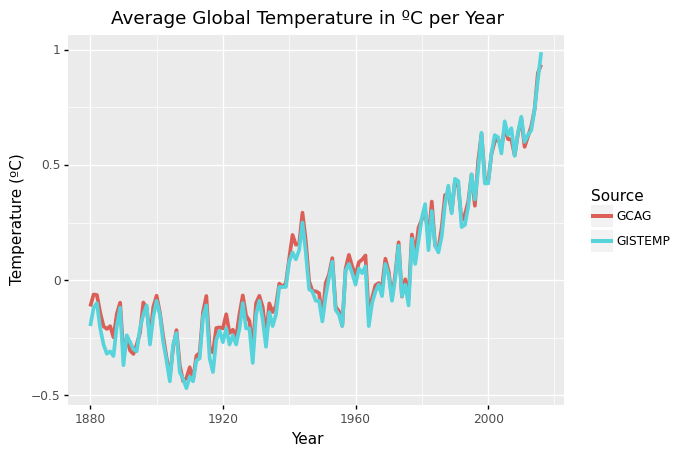

<ggplot: (8775676412425)>

In [14]:
df = pd.read_csv('global_temp.csv')
(
    ggplot(df)
    +aes(x="Year",y="Mean",color= "Source")
    +geom_line(size=1.5)
    +ggtitle("Average Global Temperature in ºC per Year")
    +ylab("Temperature (ºC)")
)


## PART 2

Read in data from the file "housing.csv". 


1) Plot 1: Create a scatterplot showing Sqft on the x-axis, and Price on the y-axis. Use the following annotations for the plot:
+ Title of the plot: "Visualization of House prices"
+ X axis: "Area in square feet"
+ Y axis: "Price".

Set the size of the points to a value of 3.

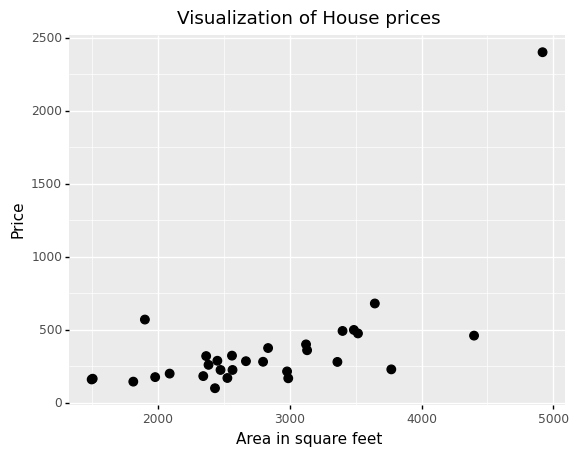

<ggplot: (8775676116861)>

In [20]:
df= pd.read_csv("housing.csv")
(
    ggplot(df)
    +aes(x="Sqft",y="Price")
    +geom_point(size=3)
    +ggtitle("Visualization of House prices")
    +ylab("Price")
    +xlab("Area in square feet")
)

2) Plot 2: Repeat the above, now with the color and size of the circles controlled by Location and Baths respectively. Set the transparency of the circles to 0.5

In [21]:
df= pd.read_csv("housing.csv")
df.head()

,Price,Sqft,Baths,Location,price/sqft
0,2400,4918,4.5,"Bryan, TX",488
1,680,3645,3.0,"Bryan, TX",187
2,570,1900,2.0,"Bryan, TX",300
3,400,3123,3.5,"Bryan, TX",128
4,320,2365,3.0,"Bryan, TX",135


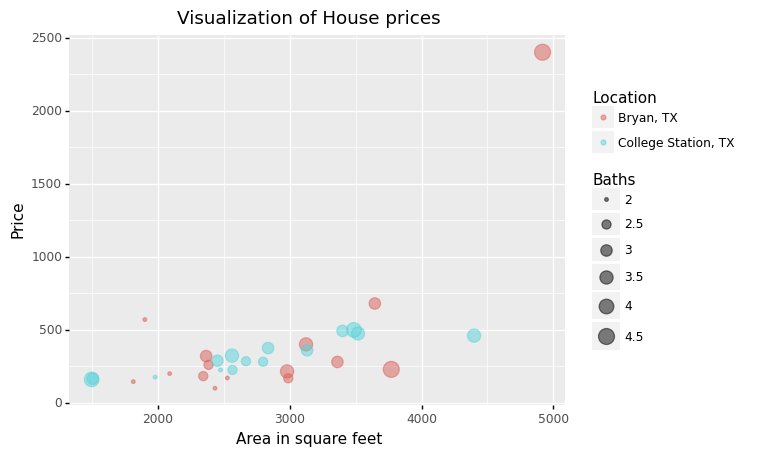

<ggplot: (8775676143601)>

In [25]:
df= pd.read_csv("housing.csv")
(
    ggplot(df)
    +aes(x="Sqft",y="Price",color="Location",size="Baths")
    +geom_point(alpha=0.5)
    +ggtitle("Visualization of House prices")
    +ylab("Price")
    +xlab("Area in square feet")
)

3) Plot 3: Create a histogram showing the distribution of the values in the 'Price' column. Notice that the histogram (and the earlier scatterplot) indicates the data may have an outlier. Explore the impact of the number of bins on the ability to see the outlier. An outlier can be seen when the bin including the outlier does not touch other bins. Plot a histogram using this minimum number of bins that make the outlier is first visible. 
+ Title of the plot: "Histogram of Price with Outlier"
+ X axis: "Price"
+ Y axis: "count".

In [27]:
df= pd.read_csv("housing.csv")
df.head()

,Price,Sqft,Baths,Location,price/sqft
0,2400,4918,4.5,"Bryan, TX",488
1,680,3645,3.0,"Bryan, TX",187
2,570,1900,2.0,"Bryan, TX",300
3,400,3123,3.5,"Bryan, TX",128
4,320,2365,3.0,"Bryan, TX",135


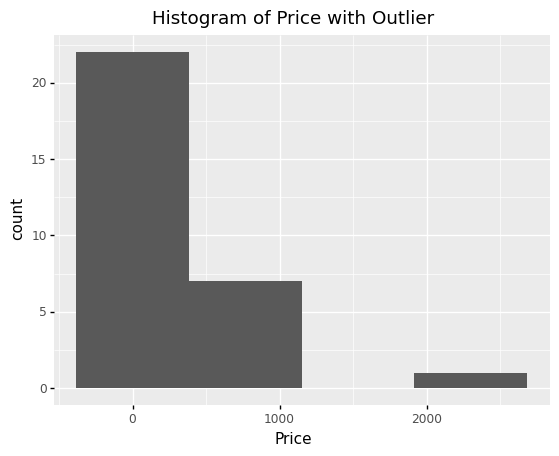

<ggplot: (8775655107353)>

In [62]:
df= pd.read_csv("housing.csv")
(
    ggplot(df)
    +aes(x="Price")
    +geom_histogram(bins=4)
    +ggtitle("Histogram of Price with Outlier")
    +ylab("count")
    +xlab("Price")
)

4) Plot 4: Remove the maximum value from the 'Price' column and plot a boxplot of prices based on Location (i.e., x axis is Location). Set the linewidth of the boxplots to 2, and fill them with the color 'crimson' and set the transparency to 0.7. If there are outliers, color them 'red'. 

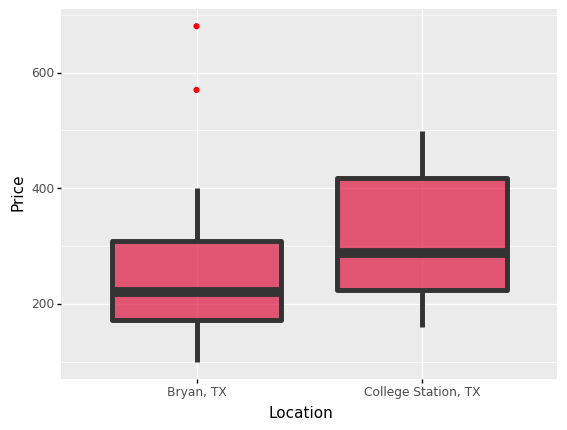

<ggplot: (8775655280381)>

In [52]:
df= pd.read_csv("housing.csv")
new_df = df.drop(df['Price'].idxmax())
(
    ggplot(new_df)
    +aes(x="Location",y='Price')
    +geom_boxplot(alpha=0.7,fill='crimson',size=2,outlier_color ='red')
    +xlab("Location")
)

## PART 3

Read in data from the file "cars_information.csv".

1) 
We want to look at the relation between hp, and mpg  for each setting of the column am (automatic or manual). Create a scatter plot of hp (x-axis) vs mpg (on the y-axis), each point colored differently according to the value of am. For each setting of am, also plot a straight line with error bars (using geom_smooth) (also colored differently according to am).

In [53]:
df= pd.read_csv("cars_information.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


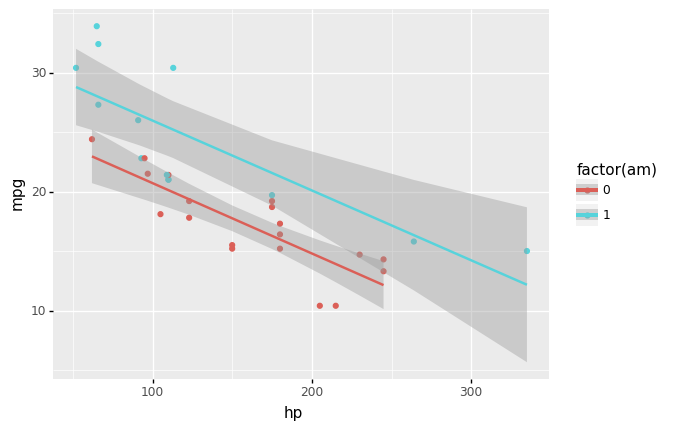

<ggplot: (8775676271393)>

In [61]:
df= pd.read_csv("cars_information.csv")
(
    ggplot(df)
    +aes(x="hp",y="mpg",color ='factor(am)')
    +geom_point()
    +geom_smooth(method='lm')
    +ylab("mpg")
    +xlab("hp")
)


2) Next, we want to simultaneously look at the relation between mpg (x-axis), and disp and hp (both on the y-axis). Create a plot with two facets, side by side in a single row. Both have mpg on the x-axis. The left facet has disp on the y-axis, and the right has hp on the y-axis. In each of these facets, we want the same two layers as before: a scatter plot and  a straight line using geom_smooth.

Hint: you will have to use the melt() method to concatenate the values in columns disp and hp into a single column. Melt should also create a second column indicating if that value is disp or hp. The value of the second column will tell ggplot which facet this belongs to (see the slides).

In [71]:
df_y =pd.melt(df,id_vars=['mpg'],value_vars=['disp','hp'])

In [72]:
df_y.head()

,mpg,variable,value
0,21.0,disp,160.0
1,21.0,disp,160.0
2,22.8,disp,108.0
3,21.4,disp,258.0
4,18.7,disp,360.0


/usr/lib/python3.7/site-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
/usr/lib/python3.7/site-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead


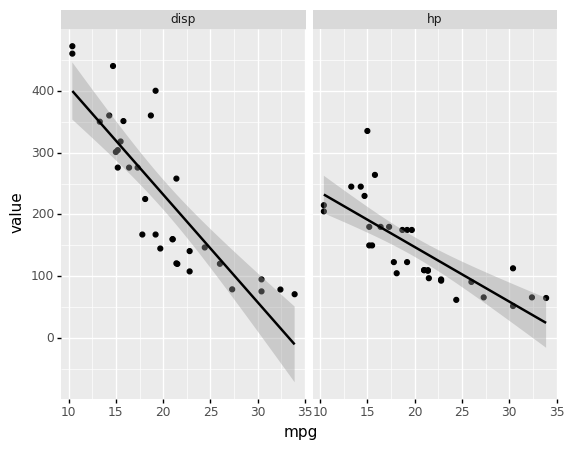

<ggplot: (8775655100533)>

In [88]:
df= pd.read_csv("cars_information.csv")
(
    ggplot(df_y)
    +aes(x="mpg",y='value')
    +geom_point()
    +geom_smooth(method='lm')
    +ylab("value")
    +xlab("mpg")
    +facet_grid('.~variable')
    
)